<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Commun_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJET -  Prédiction du succès d’une campagne de Marketing d’une banque

---


Le but de ce projet est d’aider une banque à identifier les clients qui sont les plus susceptibles de souscrire à un dépôt à terme.

Lorsqu’un client souscrit à ce produit, il place une quantité d’argent dans un compte spécifique et ne pourra pas toucher ces fonds avant l’expiration du terme. En échange, le client reçoit des intérêts de la part de la banque à la fin du terme.

Nous avons à disposition un jeu de données personnelles sur les clients contactés lors de la dernière campagne télémarketing pour la souscription du dépôt à terme.

# Sprint 1 : Explorations des données / Data Exploration
*   Ceci est la première étape d'exploration des données et de la première DataViz

In [369]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



# **1.**   Importation des modules / Importing modules


### Import

In [370]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

import plotly.express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots

import scipy.stats as stats
from scipy.stats import chi2_contingency



### Chemin / Path

In [371]:
# Chemins d'accés personalisés

## Morgane ##
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/bank.csv")

## Estelle ##
# df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/Estelle/bank.csv")

## Laurent ##
# df = pd.read_csv("")

## Guillaume ##
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/bank.csv")


# **2.**  Observation de nos données / Data Observation



## **2 - 1** : Etudes préliminaires / Preliminary Steps


In [372]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [373]:
df.shape

(11162, 17)

* Notre jeux de données est composées de **11 162 lignes et 17 colonnes**, représentées ci-dessous
* Our dataset consists of 11,162 rows and 17 columns, each representing a specific attribute. Here is an overview of the columns present in the dataset

| Colonne    | Description                                                              | Qualitative / Quantitative |
|------------|--------------------------------------------------------------------------|----------------------------|
| age        | Âge du client                                                            |Quantitative - catégorielles|
| job        | Type d'emploi du client                                                  |Qualitative - continues     |
| marital    | Statut marital du client                                                 |Qualitative - continues     |
| education  | Niveau d'éducation du client                                             |Qualitative - continues     |
| default    | Le client à t'il un défaut sur un crédit                                       |Qualitative - continues     |
| balance    | Solde moyen annuel sur le compte                                                      |Quantitative - catégorielles|
| housing    | Le client à t'il un prêt immobilier                                        |Qualitative - continues     |
| loan       | Le client à un prêt personnel en cour personnel                                         |Qualitative - continues     |
| contact    | Type de communication pour contacter le client                           |Qualitative - continues     |
| day        | Jour du mois pour le dernier contact                                     |Qualitative - continues     |
| month      | Mois de la dernière communication                                        |Qualitative - continues     |
| duration   | Durée de la dernière communication en secondes                           |Quantitative - catégorielles|
| campaign   | Nombre de contacts effectués lors de cette campagne                      |Quantitative - catégorielles|
| pdays      | Nombre de jours écoulés depuis le dernier contact de la dernière campagne|Quantitative - catégorielles|
| previous   | Nombre de contacts effectués avant cette campagne                        |Quantitative - catégorielles|
| poutcome   | Résultat de la dernière campagne de marketing précédente                 |Qualitative - continues     |
| deposit    | Le client à t'il souscrit à un dépôt à terme                               |Qualitative - continues     |


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* Observation des valeurs manquantes
* Observing missing values

In [375]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* Il semberait que nous n'ayons pas de valeurs manquantes.
Regardons maintenant les modalités par colonnes. Les modalitées sont affichées en % et arrondi à 2 chiffres après la virgule
* Display of modalities by column in %

In [376]:
# Colonnes catégorielles / Categorical variables :
cat_cols = ["job", "marital", "education", "default","housing", "loan", "contact", "poutcome", "deposit"]

for col in df[cat_cols]:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = df[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {df[col].dtypes} -')
  print('---------------------------')

> : job ==> : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
management       23.00 %
blue-collar      17.00 %
technician       16.00 %
admin.           12.00 %
services          8.00 %
retired           7.00 %
self-employed     4.00 %
student           3.00 %
unemployed        3.00 %
entrepreneur      3.00 %
housemaid         2.00 %
unknown           1.00 %
Name: job, dtype: object
- object -
---------------------------
> : marital ==> : ['married' 'single' 'divorced']
married     57.00 %
single      32.00 %
divorced    12.00 %
Name: marital, dtype: object
- object -
---------------------------
> : education ==> : ['secondary' 'tertiary' 'primary' 'unknown']
secondary    49.00 %
tertiary     33.00 %
primary      13.00 %
unknown       4.00 %
Name: education, dtype: object
- object -
---------------------------
> : default ==> : ['no' 'yes']
no     98.00 %
yes     2.00 %
Name: default,

In [377]:
# Colonnes numériques / Numeric varibles :
num_cols = ["age", "balance", "day","month","duration","campaign","pdays","previous"]
print(num_cols)

for col in df[num_cols]:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = df[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {df[col].dtypes} -')
  print('---------------------------')



['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
> : age ==> : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
31    4.00 %
32    4.00 %
34    4.00 %
33    4.00 %
35    4.00 %
       ...  
92    0.00 %
93    0.00 %
88    0.00 %
95    0.00 %
89    0.00 %
Name: age, Length: 76, dtype: object
- int64 -
---------------------------
> : balance ==> : [2343   45 1270 ... 1594 2593 -134]
 0       7.00 %
 1       0.00 %
 3       0.00 %
 2       0.00 %
 4       0.00 %
          ...  
 5517    0.00 %
 8332    0.00 %
 4859    0.00 %
-267     0.00 %
-134     0.00 %
Name: balance, Length: 3805, dtype: object
- int64 -
---------------------------
> : day ==> : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
20    5.00 %
18    5.00 %
30    4.

* Nous avons dans notre jeux de données par colonnes :
 * **job** : 1% de unknown
 * **education** : 4% de unknown
 * **pdays** : 75% des valeurs qui sont : -1
 * **previous** : 75% des valeurs qui sont : -0
 * **contact** : 21% de unknown
 * **poutcom** : 75% de unknown

In [378]:
# analyse des 75% de unknown dans "pdays" et "previous"
pdays_nul = df[df['pdays'] == -1]
previous_nul = df[df['previous'] == 0]

print('pdays_nul    :', pdays_nul.shape)
print("previous_nul :", previous_nul.shape)

pdays_nul_equal_previous_nul = pdays_nul.equals(previous_nul)
print("pdays_nul_equal_previous_nul :", pdays_nul_equal_previous_nul)

pdays_nul    : (8324, 17)
previous_nul : (8324, 17)
pdays_nul_equal_previous_nul : True


* les lignes dans **pdays = -1** et **previous = 0** sont identique
75% des clients de la campagne actuelle, n'ont pas participé à la campgne précédente, donc n'ont pas pu etre contacté.

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### 2 - 1 - 1 Mini étude: **nouveaux clients** vs **ancien clients**

In [380]:
# Nous séparons les clients en 2 catégories
# df avec les nouveaux clients
new_customers_df = pdays_nul

# df avec les anciens clients
sup_to_sup = df[df['pdays'] == -1].index
old_customers_df = df.drop(sup_to_sup)
old_customers_df = old_customers_df.reset_index(drop=True)

old_customers_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
1,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
2,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
3,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,yes
4,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes


In [381]:
new_customers_df['deposit'].value_counts(normalize= True).round(2) * 100

no     59.0
yes    41.0
Name: deposit, dtype: float64

In [382]:
old_customers_df['deposit'].value_counts(normalize= True).round(2) * 100

yes    67.0
no     33.0
Name: deposit, dtype: float64

* 41% des nouveaux client ont souscrit à cette campagne
* 67% des anciens client ont souscrit à cette campagne

### 2 - 1 - 2 Mini étude: varible **job** pour les **nouveaux** client et les **anciens**



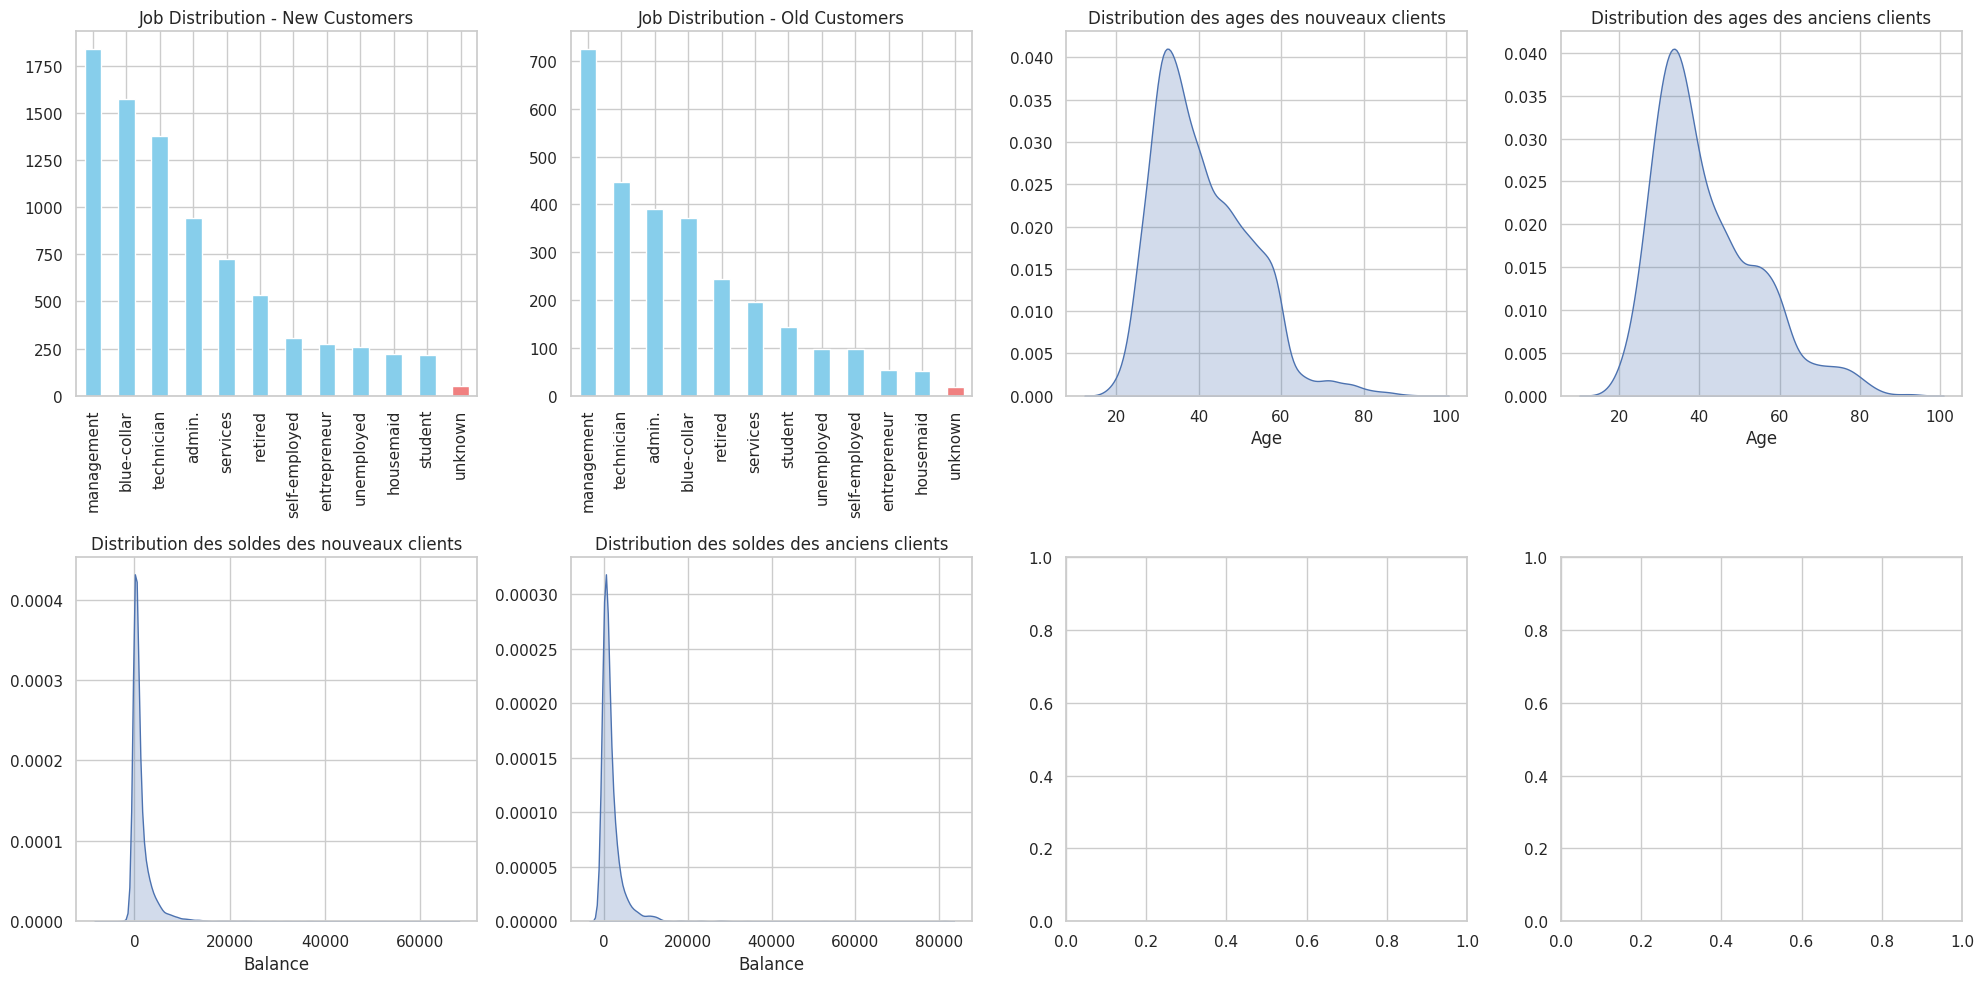

In [383]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Deux lignes, quatre colonnes

# 1 ### New Customer "Job"
axs[0, 0].set_title('Job Distribution - New Customers')
new_customers_df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0, 0]
)
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

# 2 ### Old Customer "Job"
axs[0, 1].set_title('Job Distribution - Old Customers')
old_customers_df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0, 1]
)
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')

# 3 ### Distribution age new customers
sns.kdeplot(data=new_customers_df, x='age', fill=True, ax=axs[0, 2])
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('')
axs[0, 2].set_title('Distribution des ages des nouveaux clients')

# 4 ### Distribution age old customers
sns.kdeplot(data=old_customers_df, x='age', fill=True, ax=axs[0, 3])
axs[0, 3].set_xlabel('Age')
axs[0, 3].set_ylabel('')
axs[0, 3].set_title('Distribution des ages des anciens clients')

# 5 ### Distribution balance new customers
sns.kdeplot(data=new_customers_df, x='balance', fill=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Balance')
axs[1, 0].set_ylabel('')
axs[1, 0].set_title('Distribution des soldes des nouveaux clients')

# 6 ### Distribution balance old customers
sns.kdeplot(data=old_customers_df, x='balance', fill=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Balance')
axs[1, 1].set_ylabel('')
axs[1, 1].set_title('Distribution des soldes des anciens clients')

plt.tight_layout()
plt.show()


In [384]:
# Observation de la réprésenttions des jobs pour les anciens et nouveaux clients
print("Classement des jobs pour les nouveaux clients :", new_customers_df['job'].value_counts())
print("--------------------------------")
print("Classement des jobs pour les anciens clients  :", old_customers_df['job'].value_counts())

Classement des jobs pour les nouveaux clients : management       1840
blue-collar      1573
technician       1377
admin.            944
services          726
retired           533
self-employed     307
entrepreneur      275
unemployed        259
housemaid         222
student           217
unknown            51
Name: job, dtype: int64
--------------------------------
Classement des jobs pour les anciens clients  : management       726
technician       446
admin.           390
blue-collar      371
retired          245
services         197
student          143
unemployed        98
self-employed     98
entrepreneur      53
housemaid         52
unknown           19
Name: job, dtype: int64


In [385]:
# Médiane de l'âge pour les anciens clients et les nouveaux
print('Médiane de l\'âge des anciens clients  :', old_customers_df['age'].median())
print('Médiane de l\'âge des nouveaux clients :', new_customers_df['age'].median())

# Médiane du solde pour les anciens clients et les nouveaux
print('Médiane du solde des anciens clients  :', old_customers_df['balance'].median())
print('Médiane du solde des nouveaux clients :', new_customers_df['balance'].median())

# Quartiles du solde pour les anciens clients et les nouveaux
print('Quartiles du solde des anciens clients  :')
print(old_customers_df['balance'].quantile([0.25, 0.5, 0.75]))

print('Quartiles du solde des nouveaux clients :')
print(new_customers_df['balance'].quantile([0.25, 0.5, 0.75]))


Médiane de l'âge des anciens clients  : 38.0
Médiane de l'âge des nouveaux clients : 39.0
Médiane du solde des anciens clients  : 722.0
Médiane du solde des nouveaux clients : 497.0
Quartiles du solde des anciens clients  :
0.25     219.00
0.50     722.00
0.75    2060.75
Name: balance, dtype: float64
Quartiles du solde des nouveaux clients :
0.25      94.75
0.50     497.00
0.75    1588.00
Name: balance, dtype: float64


* Il semble que pour les anciens clients et les nouveux clients:
 * la représentation de la varibles job et la distribution des ages semble etre similaire
 * il n'y a pas de grande différence sur la variable balance, grace aux études des médianes et quartiles

* **Il n'est donc pas judicieux de faire une étude séparé pour les anciens client et les nouveux**
* Nous pouvons donc supprimer les colonnes **"pdays"** et **"previous"** qui n'ont pas d'intéret dans notre cas sauf à comprendre que les clients qui ont déja souscrit a une campagne, *semblent satisfait car ils ont souscrit majoritairement a une autre campagne*


# **3.**  Traitements des données

## **3 - 1** Gestions des valeurs non désirées (unknown)


* Nous avons donc dans notre jeux de données plusieurs colonnes avec des valeurs non désirées = VND


In [386]:
# Création du DataFrame_unknown pour visualiser les valeurs "unknown"
unknown = {'Name': ['job', 'education', 'contact', 'poutcome', 'poutcome'],
           'VND': ['unknown', 'unknown', 'unknown', 'unknown', 'other'],
           '%': [1, 4, 21, 75, 5]}

unknown = pd.DataFrame(unknown)

display(unknown)

,Name,VND,%
0,job,unknown,1
1,education,unknown,4
2,contact,unknown,21
3,poutcome,unknown,75
4,poutcome,other,5


* représentation graphique de nos valeurs **unknown**

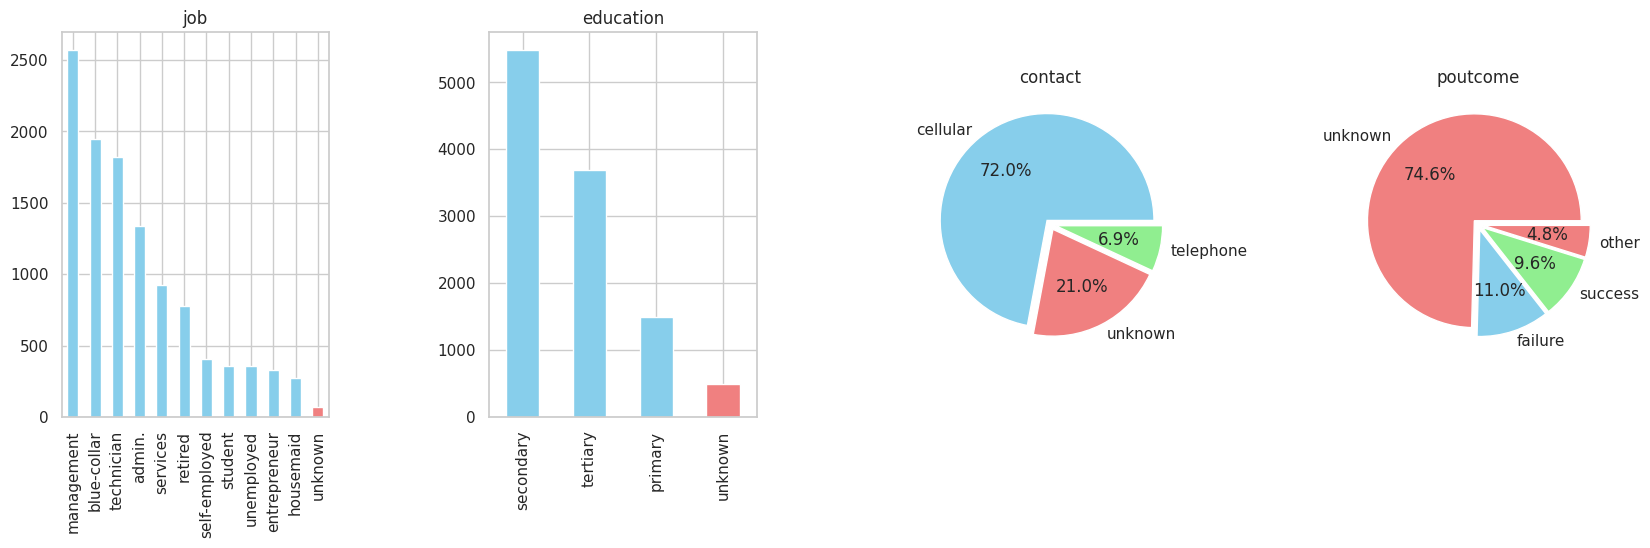

In [387]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Une ligne, quatre colonnes

#1 ### Job
axs[0].set_title('job')
df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0]
)
axs[0].set_ylabel('')
axs[0].set_xlabel('')

#2 ### Education
axs[1].set_title('education')
df['education'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[1]
)
axs[1].set_ylabel('')
axs[1].set_xlabel('')

#3 ### Contact
axs[2].set_title('contact')
df['contact'].value_counts().plot(
    kind='pie',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05),
    ax=axs[2]
)
axs[2].set_ylabel('')
axs[2].set_xlabel('')

#4 ### Poutcome
axs[3].set_title('poutcome')
df['poutcome'].value_counts().plot(
    kind='pie',
    colors=['lightcoral', 'skyblue', 'lightgreen', 'lightcoral'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05),
    ax=axs[3]
)
axs[3].set_ylabel('')
axs[3].set_xlabel('')

fig.subplots_adjust(wspace=0.6, hspace=0.8)
plt.show()


* Les graphiques précédents, représentent visuellement les valeurs **unknown** dans nos variables
* Pour les colonnes '**job**', et '**education**' nous allons supprimer ces
lignes car le % est très faible.
* La colonne '**contact**' ne nous interesse pas dans notre cas metier, nous allons donc la supprimer.
* Nous avons une redondance d’informations entre **pdays** et **previous**, nous décidons donc de supprimer **previous**
* Pour la colonne '**poutcome**', il semble ideal de créer une categorie pour regrouper les valeurs '**unknown**' et '**other**', qui représentent à eux deux 80% sous la même categorie **unknown**

* Suppression des valeurs non désirées, et de la colonne contact


In [388]:
# suppression des colonnes 'contact' et 'previous' du dataframe
col_sup = ['contact', 'previous']
df = df.drop(col_sup, axis=1)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  poutcome   11162 non-null  object
 14  deposit    11162 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


# suppresion des lignes lorsque variables "job" unknown



In [390]:
df = df[df['job'] != 'unknown']
df.shape

(11092, 15)

# suppresion des lignes lorsque variables "education" = unknown


In [391]:
df_drop = df[df['education'] != 'unknown']
df_drop.shape

(10634, 15)

In [392]:
# Calcul du nombre de lignes supprimées

rows_drop = df.shape[0] - df.shape[0]
print(f"Nous avons supprimé {rows_drop} lignes, soit {round((rows_drop / df.shape[0] * 100), 2) } % des valeurs.")

Nous avons supprimé 0 lignes, soit 0.0 % des valeurs.


In [393]:
# Fusion des 'other' et des 'unknown' de la colonne 'poutcome'

df['poutcome'] = df['poutcome'].replace('other', 'unknown')
df['poutcome'].value_counts()

unknown    8811
failure    1220
success    1061
Name: poutcome, dtype: int64

## **3 - 2** Gestions des valeurs extrêmes et/ou obérantes


### 3 - 2 - 1 Avant traitement


* Représentations avec des boxplots, des **variables numériques** avant
traitement en fonctionde **déposit** avant traitement des données


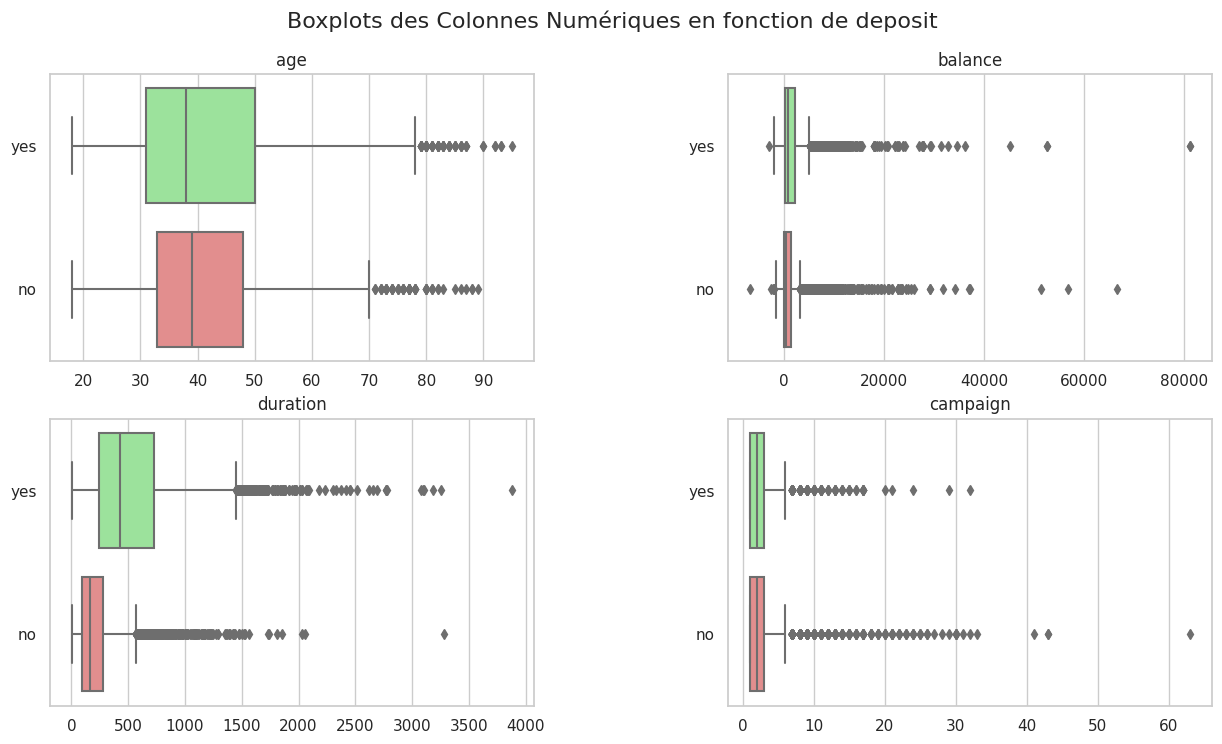

In [394]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques en fonction de deposit', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df[column],
                y=df['deposit'],
                ax=axs[i],
                palette=colors)
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


* Représentations avec des boxplots, des **variables numériques** avant
traitement des données


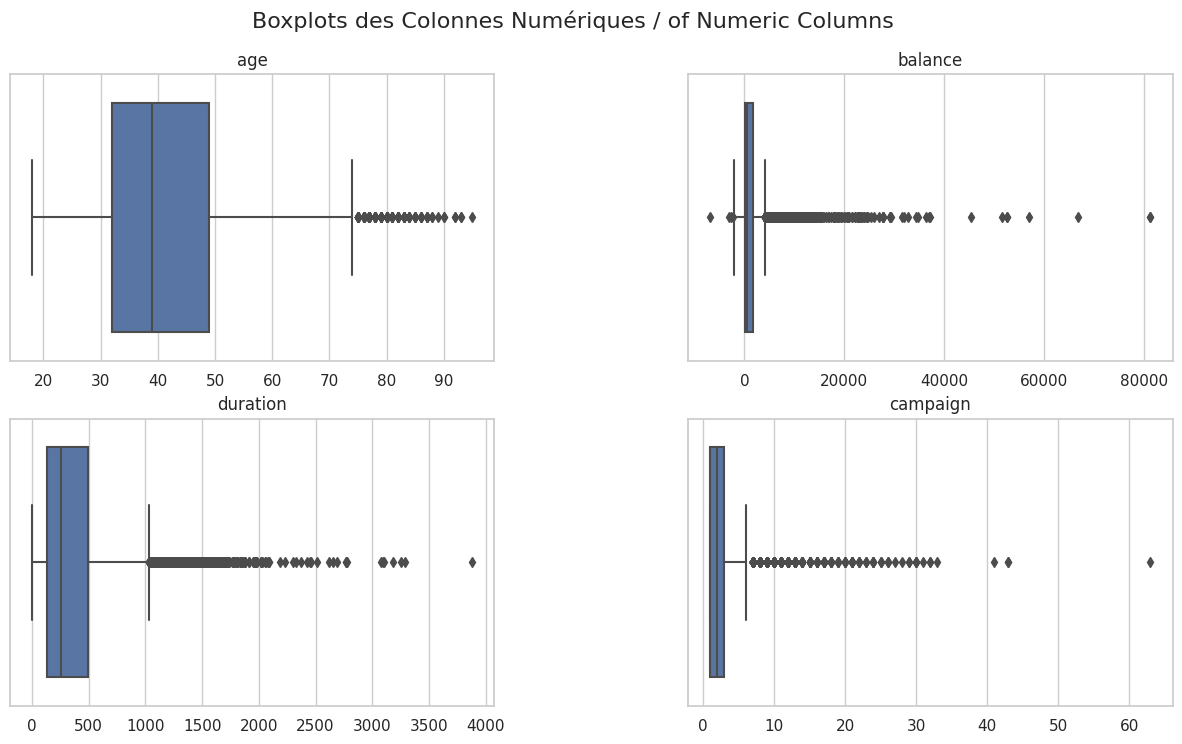

In [395]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df[column],
                ax=axs[i]
                )
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


* Calul des quartiles de chaques colonnes numériques / Calculation of quartiles of each numerical column


In [396]:
quant = [0.25, 0.5, 0.75]
quant_str = ['0.25', '0.5', '0.75']

quartiles = df[columns_num].quantile(quant)
quartiles = quartiles.rename_axis(index='quartille')
display(quartiles)

,age,balance,duration,campaign
quartille,,,,
0.25,32.0,122.0,138.00,1.0
0.50,39.0,549.0,255.00,2.0
0.75,49.0,1704.0,496.25,3.0


* Calcul des quartiles sur chaque colonnes en fonction de la valeur de **deposit**
* Calculation of quartiles on each column based on the value of **deposit**

In [397]:
quant = [0.25, 0.5, 0.75]

quartiles_grouped = df.groupby('deposit')[columns_num].quantile(quant)
display(quartiles_grouped)

age  balance  duration  campaign
deposit                                        
no      0.25  33.0     64.0      94.0       1.0
        0.50  39.0    414.0     163.0       2.0
        0.75  48.0   1319.0     282.0       3.0
yes     0.25  31.0    207.5     243.0       1.0
        0.50  38.0    733.0     426.0       2.0
        0.75  50.0   2156.0     725.0       3.0

### 3 - 2 - 2 Calcul des seuils IQR (manuel)



In [398]:
# Initialiser des dictionnaires pour stocker les quantiles de chaque colonne
quant_1 = {}
quant_2 = {}
quant_3 = {}

col_num = ['age', 'balance', 'duration', 'campaign']
df_num = df[col_num]

# Boucle pour calculer les quantiles pour chaque colonne
for column in df_num.columns:
    quantiles_column = df_num[column].quantile(quant)
    quant_1[column] = quantiles_column.iloc[0]
    quant_2[column] = quantiles_column.iloc[1]
    quant_3[column] = quantiles_column.iloc[2]


In [399]:
IQR_age = quant_3['age'] - quant_1['age']
IQR_balance = quant_3['balance'] - quant_1['balance']
IQR_duration = quant_3['duration'] - quant_1['duration']
IQR_campaign = quant_3['campaign'] - quant_1['campaign']

IQR_sup_age = quant_3['age'] + (1.5 * IQR_age)
IQR_sup_balance = quant_3['balance'] + (1.5 * IQR_balance)
IQR_sup_duration = quant_3['duration'] + (1.5 * IQR_duration)
IQR_sup_campaign = quant_3['campaign'] + (1.5 * IQR_campaign)

IQR_inf_age = quant_1['age'] - (1.5 * IQR_age)
IQR_inf_balance = quant_1['balance'] - (1.5 * IQR_balance)
IQR_inf_duration = quant_1['duration'] - (1.5 * IQR_duration)
IQR_inf_campaign = quant_1['campaign'] - (1.5 * IQR_campaign)

print('IQR_age', IQR_age )
print('IQR_balance', IQR_balance )
print('IQR_duration', IQR_duration )
print('IQR_campaign', IQR_campaign )

print('IQR_sup_age', IQR_sup_age )
print('IQR_sup_balance', IQR_sup_balance )
print('IQR_sup_duration', IQR_sup_duration )
print('IQR_sup_campaign', IQR_sup_campaign )

print('IQR_inf_age', IQR_inf_age )
print('IQR_inf_balance', IQR_inf_balance )
print('IQR_inf_duration', IQR_inf_duration )
print('IQR_inf_campaign', IQR_inf_campaign )

IQR_age 17.0
IQR_balance 1582.0
IQR_duration 358.25
IQR_campaign 2.0
IQR_sup_age 74.5
IQR_sup_balance 4077.0
IQR_sup_duration 1033.625
IQR_sup_campaign 6.0
IQR_inf_age 6.5
IQR_inf_balance -2251.0
IQR_inf_duration -399.375
IQR_inf_campaign -2.0


### 3 - 2 - 3 Calcul des seuils IQR (avec fonction)


In [400]:
def calculate_iqr(df, columns, quantiles):
    """
    Calcule les valeurs de l'IQR (Interquartile Range) ainsi que les bornes supérieures et inférieures pour chaque colonne spécifiée.

    Parameters:
    - df (DataFrame): Le DataFrame contenant les données numérique.
    - columns (list): La liste des colonnes pour lesquelles calculer les valeurs. col_num = ['a remplir]
    - quantiles (list): La liste des quantiles à calculer. quant = ['a remplir']

    Returns:
    - dict: Un dictionnaire contenant les valeurs de l'IQR, les bornes supérieures et inférieures pour chaque colonne spécifiée.
    - pour y acceder : result_iqr[...]
    """

    quant_1 = {}
    quant_3 = {}

    # Boucle pour calculer les quantiles pour chaque colonne numérique
    for column in columns:
        quantiles_column = df[column].quantile(quantiles)
        quant_1[column] = quantiles_column.iloc[0]
        quant_3[column] = quantiles_column.iloc[2]

    # Calculer les IQR
    iqr_values = {f'IQR_{column}': quant_3[column] - quant_1[column] for column in columns}

    # Calculer les bornes supérieures et inférieures pour chaque colonne
    iqr_sup_values = {f'IQR_sup_{column}': quant_3[column] + (1.5 * iqr_values[f'IQR_{column}']) for column in columns}
    iqr_inf_values = {f'IQR_inf_{column}': quant_1[column] - (1.5 * iqr_values[f'IQR_{column}']) for column in columns}

    return {**iqr_values, **iqr_sup_values, **iqr_inf_values}


col_num = ['age', 'balance', 'duration', 'campaign']
quant = [0.25, 0.5, 0.75]

result_iqr = calculate_iqr(df_num, col_num, quant)

# Afficher les résultats
for key, value in result_iqr.items():
    print(f"{key}: {value}")

IQR_age: 17.0
IQR_balance: 1582.0
IQR_duration: 358.25
IQR_campaign: 2.0
IQR_sup_age: 74.5
IQR_sup_balance: 4077.0
IQR_sup_duration: 1033.625
IQR_sup_campaign: 6.0
IQR_inf_age: 6.5
IQR_inf_balance: -2251.0
IQR_inf_duration: -399.375
IQR_inf_campaign: -2.0


### 3 - 2 - 4 Suppression des outliers

In [401]:
df = df[(df['age'] >= IQR_inf_age) & (df['age'] <= IQR_sup_age)]
df = df[(df['balance'] >= IQR_inf_balance) & (df['balance'] <= IQR_sup_balance)]
df = df[(df['duration'] >= IQR_inf_duration) & (df['duration'] <= IQR_sup_duration)]
df = df[(df['campaign'] >= IQR_inf_campaign) & (df['campaign'] <= IQR_sup_campaign)]

print("Nous avons supprimé", round((100 - (df.shape[0] * 100) / df.shape[0]), 2), "% des lignes de notre dataframe")

# à voir pour la prédiction si il faut supprimer

Nous avons supprimé 0.0 % des lignes de notre dataframe


### 3 - 2 - 5 Représentation des boxplots après traitement des outliers

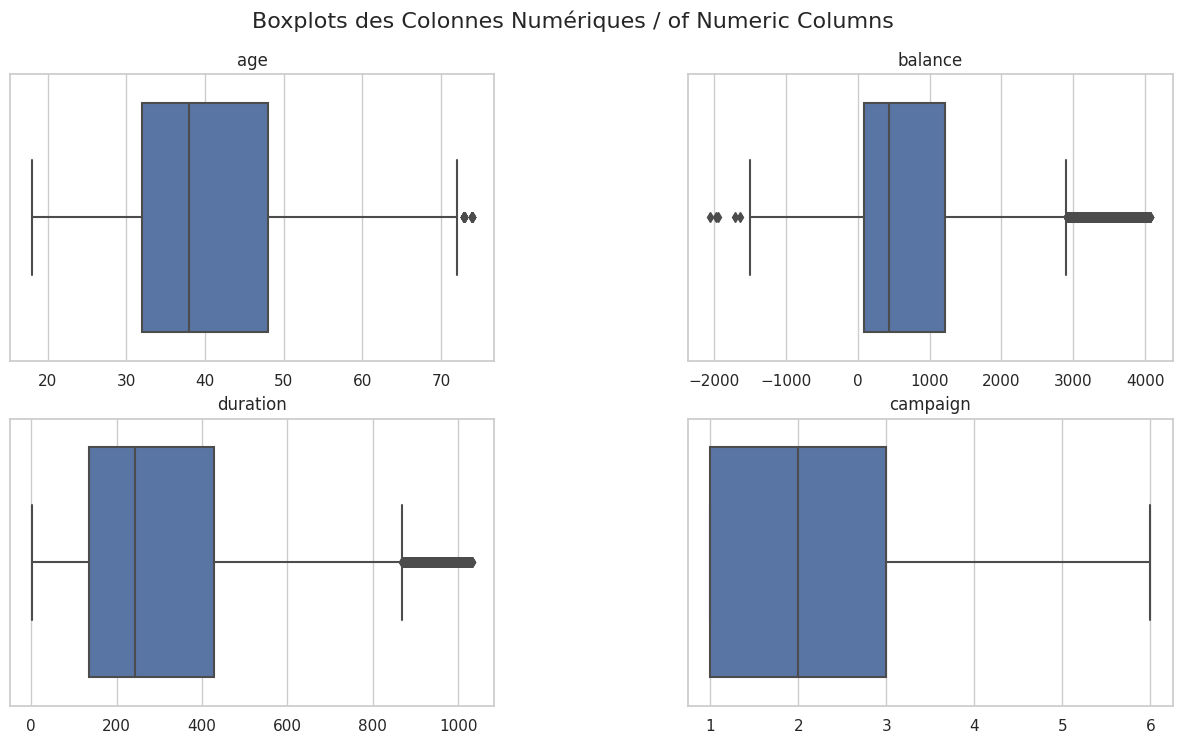

In [402]:
# Set the style
sns.set(style="whitegrid")

# Columns list
columns_num = ['age', 'balance', 'duration', 'campaign']
colors = {'yes': 'lightgreen', 'no': 'lightcoral'}

# Create a figure and axis
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Boxplots des Colonnes Numériques / of Numeric Columns', fontsize=16)

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Plot boxplots
for i, column in enumerate(columns_num):
    sns.boxplot(x=df[column],
                ax=axs[i]
                )
    axs[i].set_title(column)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
fig.subplots_adjust(top=0.9, wspace=0.4)
plt.show()


In [403]:
df.shape


(8839, 15)

# **4** : Observation de nos différentes variables en fct de la variable cible : **Deposit**:


### Variable deposit sur l'ensemble du dataset

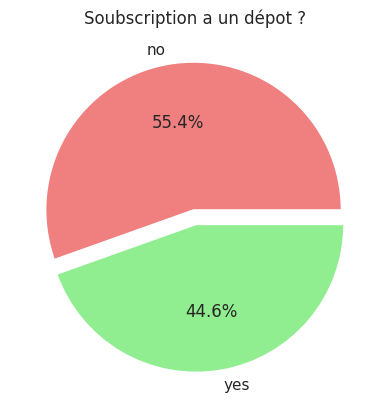

In [404]:
plt.title('Soubscription a un dépot ?')
df['deposit'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')
plt.xlabel('')
plt.show()

* 55 % des clients non pas sourcrit au dépot
* 45 % ont souscrit au dépot

La distribution de la variable cible est assez équilibrée, ce qui nous permets d'éviter les biais  

### Variables **éducation, marital, job, age** en fonction de **Deposit** - Seaborn (Caractéristiques socio-démographiques des clients)

In [405]:
# calcul des % de répartition et affichage dans un dataframe

for col in ['education','marital','job'] :
  display((pd.crosstab(df[col],df['deposit'],normalize= 0) * 100).round())
  print('\n')

  # calcul des % de répartition

deposit,no,yes
education,,
primary,66.0,34.0
secondary,58.0,42.0
tertiary,48.0,52.0
unknown,52.0,48.0


deposit,no,yes
marital,,
divorced,57.0,43.0
married,60.0,40.0
single,48.0,52.0


deposit,no,yes
job,,
admin.,55.0,45.0
blue-collar,67.0,33.0
entrepreneur,67.0,33.0
housemaid,63.0,37.0
management,52.0,48.0
retired,36.0,64.0
self-employed,57.0,43.0
services,62.0,38.0
student,24.0,76.0


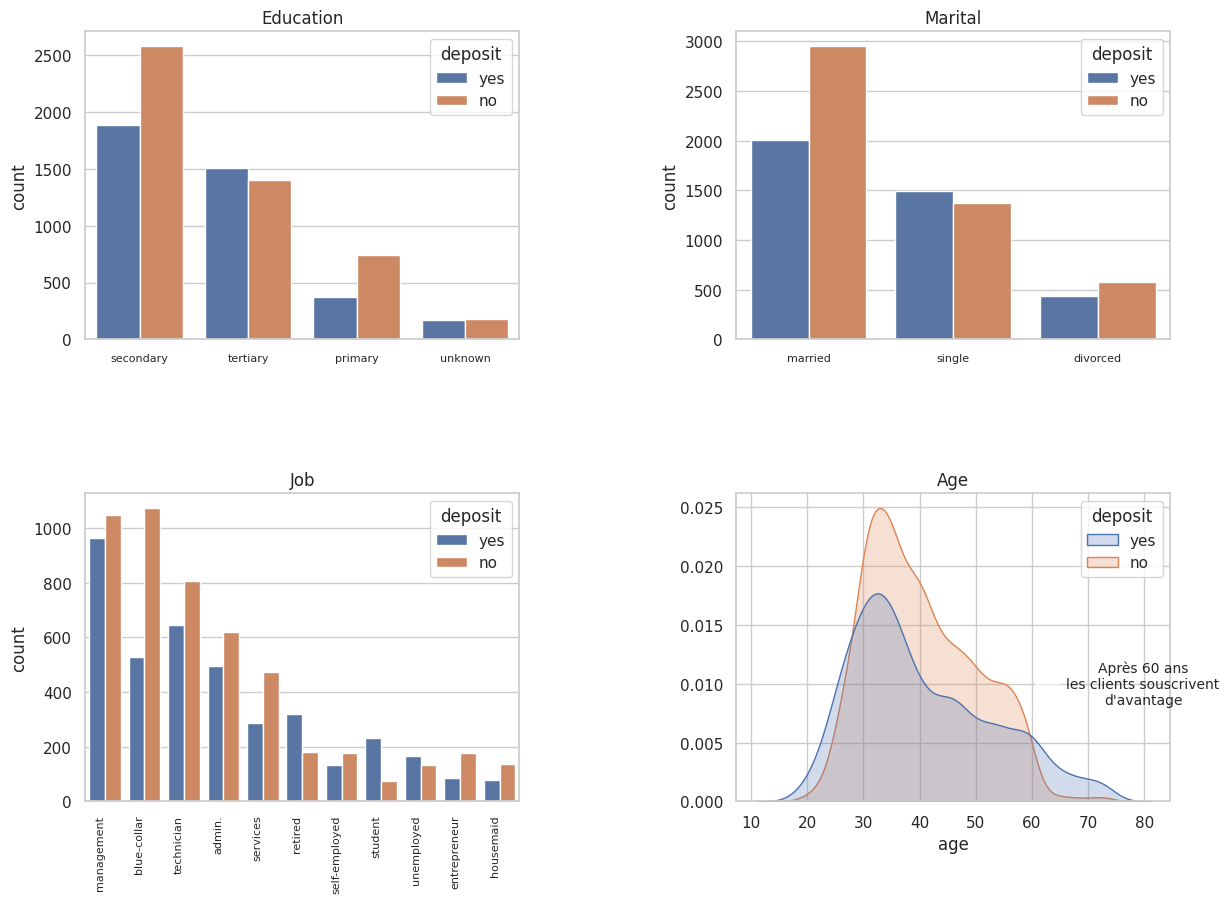

In [406]:
#Affichage graphique de "education", "marital", "job", "age"
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1 - education
sns.countplot(x= "education", hue="deposit", data=df, ax=axes[0,0])
axes[0,0].set_title('Education')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis= 'x', labelsize= 8)

# 2 - marital
sns.countplot(x= "marital", hue="deposit", data=df, ax=axes[0,1])
axes[0,1].set_title('Marital')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis= 'x', labelsize= 8)

# 3 - job
order_job = df['job'].value_counts().index
sns.countplot(x="job", hue="deposit", data=df, ax=axes[1, 0], order=order_job)
axes[1,0].set_title('Job')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis= 'x', labelsize= 8)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90, ha="right")

# 4 - age
sns.kdeplot(data=df, x='age', fill=True, hue= "deposit", ax=axes[1,1])
plt.xlabel('age')
plt.ylabel('')
plt.title('Age')

arrow_props = dict(facecolor='red', arrowstyle='->')
axes[1, 1].annotate("Après 60 ans\nles clients souscrivent\nd'avantage",
                    xy=(60, 0.01),
                    xytext=(80, 0.010),
                    fontsize=10,
                    textcoords='offset points',
                    ha='center',
                    va='center',
                    arrowprops=arrow_props)




fig.subplots_adjust(wspace= 0.5, hspace= 0.5)
plt.show()


**Age** : Les 30-40 ans sont le plus représentés dans le jeux de données (39.1%) suivi des 40-50 ans (22.1%). La moyenne d'âge des clients est de 40 ans. Les plus agés (au dessus de 60 ans) et les plus jeunes (en dessous de 30 ans) ont tendance a plus souscrire au dépôt.

**Education** : 52.6% des clients ont un niveau d'études secondaires. Ceux qui ont un niveau d'éducation primaire ont tendance à ne pas souscrire au dépôt (dans cette catégorie 66.3% n'ont pas souscrit).

**Marital** : 56.1% des clients sont marriés, 32.4% célibataires et le reste divorcées. Mariés (40% de cette catégorie ont souscrit) et divorcés (43% de cette catégorie ont souscrits) souscrivent un peu moins que les célibataires (52% de cette catégorie ont souscrit)

**Job** : Management (23%), Blue Collar(18%) et Technicians(16.6%) sont les professions les plus représentées dans le jeux de données. Les professions "Blue-collar" (67% dans cette catégorie n'ont pas souscrits) et entrepreneurs (67.5% dans cette catégorie n'ont pas souscrits) souscrivent moins au dépôt. A l'inverse les retraités (63.3% dans cette catégorie ont souscrits) et les étudiants (77% dans cette catégorie ont souscrit) ont plus souscrit au dépôt à terme.

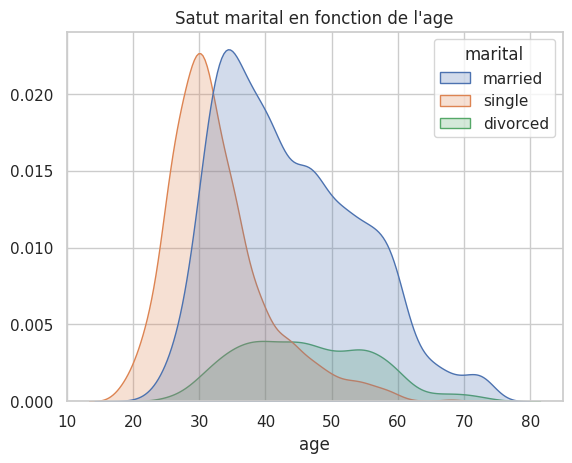

In [407]:
# Petite étude du statut  martial en fct de l'age.
# voir si utile et si c'est juste avec Manon

sns.kdeplot(data=df, x='age',fill=True, hue= "marital")
plt.xlabel('age')
plt.ylabel('')
plt.title("Satut marital en fonction de l'age")

plt.show()

**Housing** : 48.8% des clients ont un prêt immobilier. Ces derniers souscrivent moins au dépôt à terme (66.8 % d'entre eux n'ont pas pris le dépôt à terme)

**Loan** : La majorité des individus n'ont pas de prêt personel (86.1%)

**Default** : 98.4% du jeux de données à "non" pour cette valeur, pas de défaut de paiement sur un crédit.

**balance** : 50% des clients ont un solde moyen annuel en dessous de 432. Si l'on regroupe les clients par catégorie de solde, l'on remarque que plus le solde augmente plus le % de clients qui souscrivent au dépôt à terme augmentent.



* Rajouter un graphique pour visualiser le nombre de dépot en fct du mois (estelle / laurent, mois=mai ) # Laurent , j'ai fait des graphiques vite fait tu peux les changer ou les améliorer et les mettre en subplot

### Variables **month**, **campaign**, **duration** en fonction de **deposit** - Seaborn (Caractéristiques de la campagne marketing)

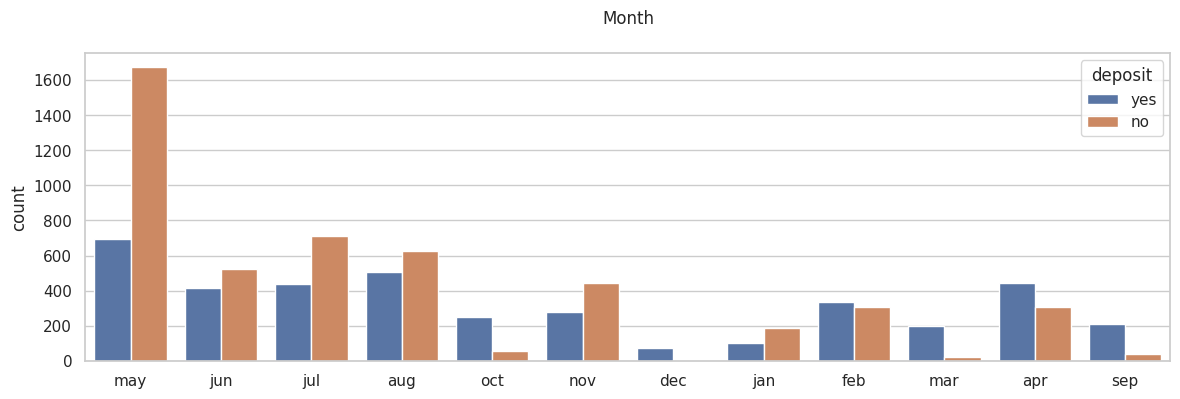

In [408]:
plt.figure(figsize=(14,4))
sns.countplot(x= "month", data = df, hue = "deposit")
plt.title('Month\n')
plt.xlabel('')
plt.show()

Sur cette campagne les clients ont été surtout contactés en Mai, juin, juillet et Août. 26.7% des clients sont contactés en Mai et seulement 29.5% ont souscrit à un dépot à terme ce mois là. Sur Mars, Septembre, Octobre et Décembre beaucou moin de clients ont été contactés mais sur ces mois là, plus de 80% des clienst ont souscrits

In [409]:
pd.crosstab(df['campaign'],df['deposit'], normalize = 0)

deposit,no,yes
campaign,,
1,0.497405,0.502595
2,0.580442,0.419558
3,0.580258,0.419742
4,0.656201,0.343799
5,0.684713,0.315287
6,0.696833,0.303167


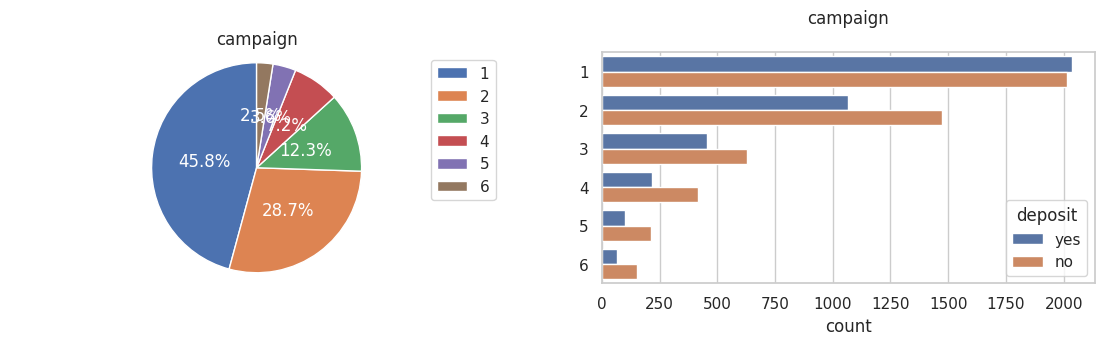

In [410]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.pie(x = df['campaign'].value_counts(),labels = df['campaign'].value_counts().index, autopct='%1.1f%'+'%',shadow=False,
        startangle=90,textprops=dict(color="w"),pctdistance = 0.5)
plt.axis('equal')
plt.title('campaign')
plt.legend();

plt.subplot(1, 2, 2)
sns.countplot(y= "campaign", data = df, hue = "deposit")
plt.title('campaign\n')
plt.ylabel('')
plt.show()

74.3% des clients ont été contactés moins de deux fois. On voit que plus le nombre d'appels effectués augmente plus le risque de refus du dépôt augmente. (49% de refus pour les clients contactés une fois , contre 65% de refus pour les clients contactés 4 fois)

In [411]:
df['dur_cat'] = pd.cut(df['duration'], bins=[0, 100, 242, 432, 1000,float('Inf')], labels=['<100', '100-242', '242-432', '432-1000','>1000'])
pd.crosstab(df['dur_cat'],df['deposit'], normalize = 0) * 100

deposit,no,yes
dur_cat,,
<100,92.640693,7.359307
100-242,67.259552,32.740448
242-432,48.745520,51.254480
432-1000,22.550398,77.449602
>1000,11.538462,88.461538


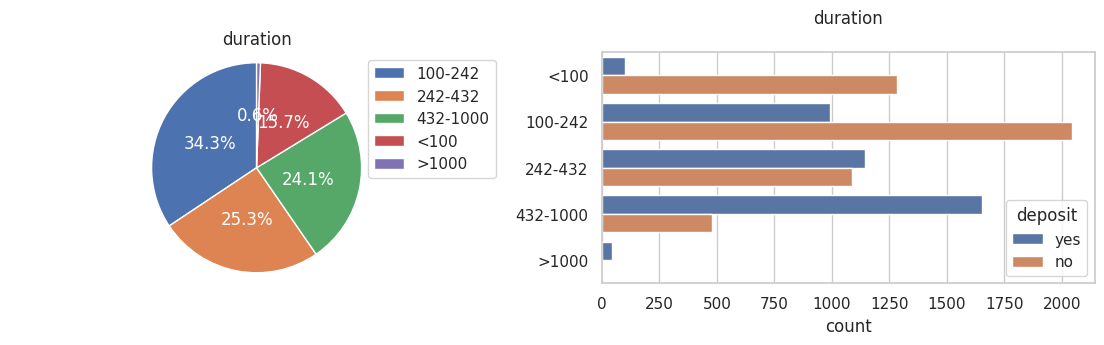

In [412]:

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)

plt.pie(x = df['dur_cat'].value_counts(),labels = df['dur_cat'].value_counts().index, autopct='%1.1f%'+'%',shadow=False,
        startangle=90,textprops=dict(color="w"),pctdistance =0.5)
plt.axis('equal')
plt.title('duration')
plt.legend();

plt.subplot(1, 2, 2)
sns.countplot(y= 'dur_cat', data = df, hue = "deposit")
plt.title('duration\n')
plt.ylabel('')

plt.show();

 75% des appels durent moins de 432 secondes ( environ 7 minutes). En moyenne un appel dure 314 secondes ( environ 5 minutes). On remarque que plus le temps de l'appel a été long plus l'issue a été un succès (client a souscrit)

In [413]:
pd.crosstab(df['poutcome'],df['deposit'], normalize = 0) * 100

deposit,no,yes
poutcome,,
failure,51.926782,48.073218
success,8.987486,91.012514
unknown,61.875181,38.124819


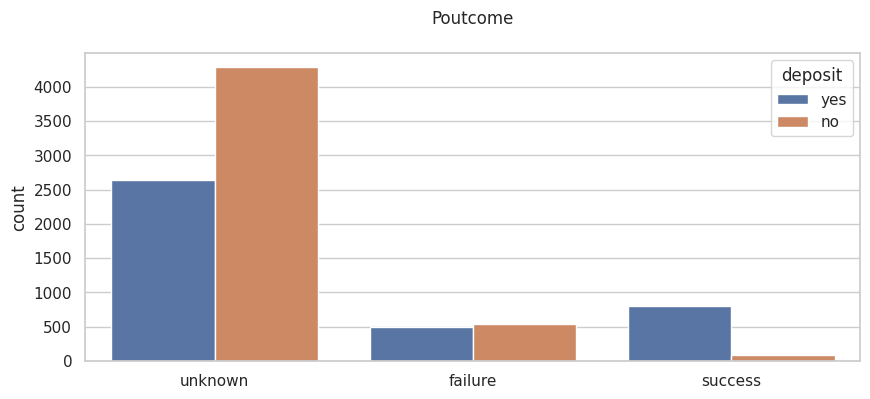

In [414]:
plt.figure(figsize=(10,4))
sns.countplot(x= "poutcome", data = df, hue = "deposit")
plt.title('Poutcome\n')
plt.xlabel('')
plt.show()

In [415]:
# Etudes des anciens clients souscripteurs de la précédente camapgne a la nouvelle campagne
df_succes = df[df["poutcome"] == 'success']
df_succes['deposit'].value_counts(normalize= True).round(2) * 100

yes    91.0
no      9.0
Name: deposit, dtype: float64

on voit que la majorité des clients qui avaient souscrits à un dépot à termes lors de la dernière campagne (90.37%), souscrivent à nouveau.

### Varibles **éducation, marital, job, poutcome** en fonction de **Deposit** - Plotly sans %


In [416]:
# @title
# Créez une figure avec des sous-graphiques
fig = make_subplots(rows=2, cols=2, subplot_titles=['Job', 'Marital', 'Education', 'poutcome'])

# 1 ## ## Job ##----------------------------------------------------------------------

# Définition de l'ordre pour un affichage plus cochèrent
order_job = df['job'].value_counts().index

# histogrammes avec l'ordre spécifié pour la colonne 'job'
fig.add_trace(go.Histogram(x = df[df["deposit"] == 'yes']['job'], # job quand deposit = yes
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           hovertemplate = "%{percent}",
                           marker = dict(color='lightblue'),
                           name=  'job: Yes'),
              row=1, col=1)

fig.add_trace(go.Histogram(x = df[df["deposit"] == 'no']['job'], # job quand deposit = no
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightcoral'),
                           name = 'job: No'),
              row=1, col=1)

# Mise à jour des axes pour partager le même ordre
fig.update_xaxes(categoryorder='array', categoryarray=order_job, row=1, col=1)
fig.update_xaxes(categoryorder='array', categoryarray=order_job, row=1, col=1)

fig.update_layout(showlegend=True)

# 2 ## ## Marital ##----------------------------------------------------------------------
fig.add_trace(go.Histogram(x = df[df["deposit"] == 'yes']['marital'], # marital quand deposit = yes
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightblue'),
                           name = 'marital: Yes'),
              row=1, col=2)

fig.add_trace(go.Histogram(x = df[df["deposit"] == 'no']['marital'], # job quand deposit = no
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightcoral'),
                           name = 'marital: No'),
              row=1, col=2)

fig.update_layout(showlegend=True)

# 3 ## ## Education ## ----------------------------------------------------------------------
fig.add_trace(go.Histogram(x = df[df["deposit"] == 'yes']['education'],
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightblue'),
                           name = 'education: Yes'),
              row=2, col=1)

fig.add_trace(go.Histogram(x = df[df["deposit"] == 'no']['education'],
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightcoral'),
                           name = 'education: No'),
              row=2, col=1)

fig.update_layout(showlegend=True)

# 4 ## ## poutcome ##----------------------------------------------------------------------
fig.add_trace(go.Histogram(x = df[df["deposit"] == 'yes']['poutcome'],
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightblue'),
                           name = 'poutcome: Yes'),
              row=2, col=2)

fig.add_trace(go.Histogram(x = df[df["deposit"] == 'no']['poutcome'],
                           nbinsx = len(order_job),
                           histfunc = 'count',
                           marker = dict(color='lightcoral'),
                           name = 'poutcome: No'),
              row=2, col=2)

## titre et personalisation ##--------------------------------------------------------------
fig.update_layout(
    showlegend=True,
    width=1000,
    height=800,
    title=dict(
        text='<b>Histogramme des différentes variables catégoriell en fonction de la valeur de deposit</b>',
        x=0.5,                            # Centrer horizontalement
        y=0.95,                           # Ajuster la position verticalement
        xanchor='center',                 # Ancrage au centre
        yanchor='top',                    # Ancrage en haut
        font=dict(
            family='Arial',               # Choisir une police
            size=24,                      # Choisir la taille de la police
            color='black')),
    legend=dict(
        title=dict(
            text='<b>Légende</b>',
            font=dict(
                family='Arial',           # Choisir une police
                size=18,                  # Choisir la taille de la police
                color='black' ))))

# Afficher la figure
fig.show()




### Varibles **éducation, marital, job, poutcome** en fonction de **Deposit** - Plotly avec %


In [448]:
# @title
# Créez une figure avec des sous-graphiques
fig = make_subplots(rows=2, cols=2, subplot_titles=['Job', 'Marital', 'Education', 'poutcome'])

# Filter all data for 'yes' and 'no'
df_yes = df[df["deposit"] == 'yes']
df_no = df[df["deposit"] == 'no']

# 1 ## ## Job ##----------------------------------------------------------------------

# Calculate counts for 'yes' and 'no' deposits for 'job'
df_yes_count_job = df_yes['job'].value_counts()
df_no_count_job = df_no['job'].value_counts()

# Combine 'yes' and 'no' counts into a single DataFrame
df_combined_job = pd.DataFrame({'Job': df_yes_count_job.index,
                                'Yes': df_yes_count_job.values,
                                'No': df_no_count_job.values})

# Melt the DataFrame for easier plotting
df_melted_job = pd.melt(df_combined_job,
                        id_vars='Job',
                        var_name='Deposit',
                        value_name='Count')

# Calculate percentages and round them
df_melted_job['Percentage'] = (((df_melted_job['Count'] / df_melted_job.groupby('Job')['Count'].transform('sum')) * 100).round()).apply(lambda x: '{}%'.format(x))

# Plot for Job
fig.add_trace(go.Bar(x=df_melted_job[df_melted_job['Deposit'] == 'Yes']['Job'],
                     y=df_melted_job[df_melted_job['Deposit'] == 'Yes']['Count'],
                     text=df_melted_job[df_melted_job['Deposit'] == 'Yes']['Percentage'],
                     hoverinfo='text',
                     name='Yes_job',
                     marker=dict(color='lightblue')),
              row=1, col=1)

fig.add_trace(go.Bar(x=df_melted_job[df_melted_job['Deposit'] == 'No']['Job'],
                     y=df_melted_job[df_melted_job['Deposit'] == 'No']['Count'],
                     text=df_melted_job[df_melted_job['Deposit'] == 'No']['Percentage'],
                     hoverinfo='text',
                     name='No_job',
                     marker=dict(color='lightcoral')),
              row=1, col=1)


# 2 ## ## Marital ##----------------------------------------------------------------------
# Calculate counts for 'yes' and 'no' deposit for 'marital'
df_yes_count_marital = df_yes['marital'].value_counts()
df_no_count_marital = df_no['marital'].value_counts()

# Combine 'yes' and 'no' counts into a single DataFrame
df_combined_marital = pd.DataFrame({'Marital': df_yes_count_marital.index,
                                    'Yes': df_yes_count_marital.values,
                                    'No': df_no_count_marital.values})

# Melt the DataFrame for easier plotting
df_melted_marital = pd.melt(df_combined_marital,
                            id_vars='Marital',
                            var_name='Deposit',
                            value_name='Count')

# Calculate percentages and round them
df_melted_marital['Percentage'] = (((df_melted_marital['Count'] / df_melted_marital.groupby('Marital')['Count'].transform('sum')) * 100).round()).apply(lambda x: '{}%'.format(x))

# Plot for Marital
fig.add_trace(go.Bar(x=df_melted_marital[df_melted_marital['Deposit'] == 'Yes']['Marital'],
                     y=df_melted_marital[df_melted_marital['Deposit'] == 'Yes']['Count'],
                     text=df_melted_marital[df_melted_marital['Deposit'] == 'Yes']['Percentage'],
                     hoverinfo='text',
                     name='Yes_marital',
                     marker=dict(color='lightblue')),
              row=1, col=2)

fig.add_trace(go.Bar(x=df_melted_marital[df_melted_marital['Deposit'] == 'No']['Marital'],
                     y=df_melted_marital[df_melted_marital['Deposit'] == 'No']['Count'],
                     text=df_melted_marital[df_melted_marital['Deposit'] == 'No']['Percentage'],
                     hoverinfo='text',
                     name='No_marital',
                     marker=dict(color='lightcoral')),
              row=1, col=2)

# 3 ## ## Education ## ----------------------------------------------------------------------
# Calculate counts for 'yes' and 'no' deposits for 'education'
df_yes_count_education = df_yes['education'].value_counts()
df_no_count_education = df_no['education'].value_counts()

# Combine 'yes' and 'no' counts into a single DataFrame
df_combined_education = pd.DataFrame({'Education': df_yes_count_education.index,
                                      'Yes': df_yes_count_education.values,
                                      'No': df_no_count_education.values})

# Melt the DataFrame for easier plotting
df_melted_education = pd.melt(df_combined_education,
                              id_vars='Education',
                              var_name='Deposit',
                              value_name='Count')

# Calculate percentages and round them
df_melted_education['Percentage'] = (((df_melted_education['Count'] / df_melted_education.groupby('Education')['Count'].transform('sum')) * 100).round()).apply(lambda x: '{}%'.format(x))

# Plot for Education
fig.add_trace(go.Bar(x=df_melted_education[df_melted_education['Deposit'] == 'Yes']['Education'],
                     y=df_melted_education[df_melted_education['Deposit'] == 'Yes']['Count'],
                     text=df_melted_education[df_melted_education['Deposit'] == 'Yes']['Percentage'],
                     hoverinfo='text',
                     name='Yes_education',
                     marker=dict(color='lightblue')),
              row=2, col=1)

fig.add_trace(go.Bar(x=df_melted_education[df_melted_education['Deposit'] == 'No']['Education'],
                     y=df_melted_education[df_melted_education['Deposit'] == 'No']['Count'],
                     text=df_melted_education[df_melted_education['Deposit'] == 'No']['Percentage'],
                     hoverinfo='text',
                     name='No_education',
                     marker=dict(color='lightcoral')),
              row=2, col=1)


# 4 ## ## poutcome ##----------------------------------------------------------------------
# Calculate counts for 'yes' and 'no' deposits for 'poutcome'
df_yes_count_poutcome = df_yes['poutcome'].value_counts()
df_no_count_poutcome = df_no['poutcome'].value_counts()

# Combine 'yes' and 'no' counts into a single DataFrame
df_combined_poutcome = pd.DataFrame({'poutcome': df_yes_count_poutcome.index,
                                     'Yes': df_yes_count_poutcome.values,
                                     'No': df_no_count_poutcome.values})

# Melt the DataFrame for easier plotting
df_melted_poutcome = pd.melt(df_combined_poutcome,
                             id_vars='poutcome',
                             var_name='Deposit',
                             value_name='Count')

# Calculate percentages and round them
df_melted_poutcome['Percentage'] = ((df_melted_poutcome['Count'] / df_melted_poutcome.groupby('poutcome')['Count'].transform('sum')) * 100).round().apply(lambda x: '{}%'.format(x))

# Plot for poutcome
fig.add_trace(go.Bar(x=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'Yes']['poutcome'],
                     y=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'Yes']['Count'],
                     text=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'Yes']['Percentage'],
                     hoverinfo='text',
                     name='Yes_poutcome',
                     marker=dict(color='lightblue')),
              row=2, col=2)

fig.add_trace(go.Bar(x=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'No']['poutcome'],
                     y=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'No']['Count'],
                     text=df_melted_poutcome[df_melted_poutcome['Deposit'] == 'No']['Percentage'],
                     hoverinfo='text',
                     name='No_poutcome',
                     marker=dict(color='lightcoral')),
              row=2, col=2)

# Titre et personnalisation --------------------------------------------------------------
fig.update_layout(
    showlegend=True,
    width=1400,
    height=800,
    title=dict(
        text='<b>Histogramme des différentes variables catégorielles en fonction de la valeur de deposit</b>',
        x=0.5,                            # Centrer horizontalement
        y=0.95,                           # Ajuster la position verticalement
        xanchor='center',                 # Ancrage au centre
        yanchor='top',                    # Ancrage en haut
        font=dict(
            family='Arial',               # Choisir une police
            size=24,                      # Choisir la taille de la police
            color='black')),
    legend=dict(
        title=dict(
            text='<b>Legend</b>',
            font=dict(
                family='Arial',           # Choisir une police
                size=18,                  # Choisir la taille de la police
                color='black' ))))

# Afficher la figure
fig.show()




* Es ce qu'il y a des choses intéréssantes à tirer comme observations ?




# **5** : Explorations statistiques / Statistical explorations


## 5 - 1 : Heatmap

Relation entre les variables quantitatives

In [ ]:
# sélection des variables quantitatives et calcul des corrélations entre ces variables

cor = df.select_dtypes(include = ['int', 'float']).corr()
fig, ax = plt.subplots(figsize = (6,4))
sns.heatmap(cor, annot = True,ax = ax, cmap = "coolwarm")
plt.show()

il ne semble pas y avoir de fortes correlations entre les variables quantitatives

## 5 - 2 : Etude entre variables categorielles / Study between categorical variables

### Education - Deposit

In [ ]:
# Hypothèse / Hypothesis
# H0 : La varible "deposit" est independente de "education" / The “deposit” variable is independent of “education”
# H1 : La varible "deposit" est dependente de "education" / The “deposit” variable is dependent of “education”

# Cross tab
crosstab_education_deposit = pd.crosstab(df["deposit"], df["education"])

# chi-2 test
result_chi2_education_deposit = chi2_contingency(crosstab_education_deposit)

#
print("The test statistic is       : ", result_chi2_education_deposit[0], "\n"
      "The p-value of the test is  : ", result_chi2_education_deposit[1], "\n")


# Conclusions :
print("Conclusion : if p-p_value (< 0.05) => reject H0 and accept H1.")


* Il y a une depandance statistique entre l'éducation est le choix du déposit
* There is a statistical dependence between education and choice of deposit

### Marital - Deposit

In [ ]:
# Hypothèse / Hypothesis
# H0 : La varible "deposit" est independente de "martital" / The “deposit” variable is independent of "martital"
# H1 : La varible "deposit" est dependente de "martital" / The “deposit” variable is dependent of "martital"

# Cross tab
crosstab_marital_deposit = pd.crosstab(df["deposit"], df["marital"])

# chi-2 test
result_chi2_marital_deposit = chi2_contingency(crosstab_marital_deposit)

#
print("The test statistic is       : ", result_chi2_marital_deposit[0], "\n"
      "The p-value of the test is  : ", result_chi2_marital_deposit[1], "\n")


# Conclusions :
print("Conclusion : if p-p_value (< 0.05) => reject H0 and accept H1.")


* Il y a une depandance statistique entre marital est le choix du déposit
* There is a statistical dependence between marital and choice of deposit

### Job - Deposit

In [ ]:
# Hypothèse / Hypothesis
# H0 : La varible "deposit" est independente de "job" / The “deposit” variable is independent of "job"
# H1 : La varible "deposit" est dependente de "job" / The “deposit” variable is dependent of "job"

# Cross tab
crosstab_job_deposit = pd.crosstab(df["deposit"], df["job"])

# chi-2 test
result_chi2_job_deposit = chi2_contingency(crosstab_job_deposit)

#
print("The test statistic is       : ", result_chi2_job_deposit[0], "\n"
      "The p-value of the test is  : ", result_chi2_job_deposit[1], "\n")


# Conclusions :
print("Conclusion : if p-p_value (< 0.05) => reject H0 and accept H1.")


* Il y a une depandance statistique entre job est le choix du déposit
* There is a statistical dependence between job and choice of deposit

## 5 - 3 : Etude entre variables categorielles et variables numériques / Study between categorical variables and numerical variables

### correlation Bisériale **age** - **deposit**

In [ ]:
df_drop.head()

In [ ]:
# trasnformer "yes" et "no" de "deposit" en 0 et 1
df_biseriale = df.replace({'deposit': {'yes': 1, 'no': 0}})

In [ ]:
# Hypothèse / Hypothesis
# H0 : Il n'y a pas d'influence significative de l'"age" sur le "deposit" / There is no significant influence of "age" on "deposit"
# H1 : Il y a une influence significative de l'"age" sur le "deposit" / There is a significant influence of "age" on "deposit"

# Calcul de la corrélation bisériale
correlation, p_value = stats.pointbiserialr(df_biseriale["deposit"], df_biseriale['age'])

# Affichage des résultats
print(f"Corrélation bisériale : {correlation}")
print(f"P-value : {p_value}")

* il n'y a pas d'influance significative de l'**age** sur la varible **deposit** / there is no significant influence of **age** on the **deposit** variable

### correlation Bisériale **balance** - **deposit**

In [ ]:
# Hypothèse / Hypothesis
# H0 : Il n'y a pas d'influence significative de la"balance" sur le "deposit" / There is no significant influence of "balance" on "deposit"
# H1 : Il y a une influence significative de la "balance" sur le "deposit" / There is a significant influence of "balance" on "deposit"

# Calcul de la corrélation bisériale
correlation, p_value = stats.pointbiserialr(df_biseriale["deposit"], df_biseriale['balance'])

# Affichage des résultats
print(f"Corrélation bisériale : {correlation}")
print(f"P-value : {p_value}")

* Morgane, test anova entre balance et déposit
* Estelle : df.corr - sns.heatmap à mettre avant les tests  
* Estelle : tests stats entre proffesion est niveau éducation et job / mariée pas marié /  

# Test ANOVA

In [ ]:
## Les modalités de deposit :
print("Les différentes modalités de déposit sont :", df["deposit"].unique())

## Les hypothèses :
print("Les hypothèses : ")
print("H0 : Il n'y a pas d'influence significative du type de deposit sur la balance")
print("H1 : Il y a une influence significative du type de deposit sur la balance")


In [ ]:
##  Le test ANOVA :
import statsmodels.api
result = statsmodels.formula.api.ols('balance ~ deposit', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1: Il y a une influence significative du type de deposit sur la balance")
# on conclut donc a une influence significative du type de la douleur sur la fréquence maximale

In [ ]:
#Education et M

### Education et Marital

In [ ]:
pd.crosstab(df['education'],df['marital'], normalize = 0)

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y= 'education', data = df, hue = "marital")
plt.show()

Il semble y avoir une relation entre marital et education. la proportion des clients mariés baisse avec leur niveau d'étude

In [ ]:
#Effectuons le test de Khi2 d'indépendance Education et marital
#H0 : Education est indépendante de marital
#H1 : Education n'est pas indépendante de marital

ct = pd.crosstab(df.education,df.marital)

## Le test chi2 d'indépendance :
from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(ct)
statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_valeur, "\n")

p_valeur est très petite donc H1 est acceptée